# BELTRANS statistics

This notebook displays statistics about the BELTRANS corpus. It aims to measure the improvement performed by different data integration or enrichment techniques.


In [1]:
import pandas as pd
import utils
import utils_stats
import utils_plot
from datetime import datetime

## Existing measurements

The measured statistics currently evolve like this:



In [2]:
translationMeasurementFiles = [
    '2022-05-03-translation-stats.csv', '2022-05-09-translation-stats.csv', 
    '2022-05-23-translation-stats.csv', '2022-06-07-translation-stats.csv',
    '2022-06-16-translation-stats.csv', '2022-06-20-translation-stats.csv',
    '2022-06-23-translation-stats.csv', '2022-06-24-translation-stats.csv',
    '2022-07-18-translation-stats.csv'
]

In [3]:
translationStats = utils_stats.mergeMeasurementsToDataFrame('./measurements', translationMeasurementFiles)
statsFRNL = translationStats[translationStats['corpus'] == 'FR-NL'].copy()
statsNLFR = translationStats[translationStats['corpus'] == 'NL-FR'].copy()
statsOther = translationStats[translationStats['corpus'] == 'OTHER'].copy()

## Identifiers
The total number of translations and how much have which third party identifier.

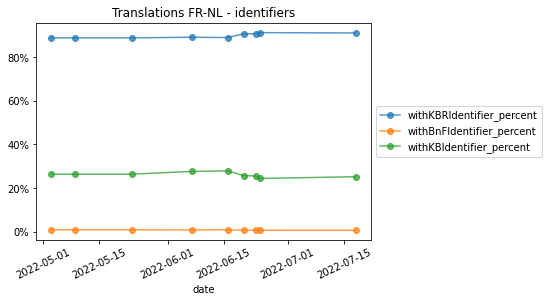

In [4]:
utils_plot.plotPercentageTimeline(statsFRNL,
                                  ['withKBRIdentifier', 'withBnFIdentifier', 'withKBIdentifier'],
                                  'Translations FR-NL - identifiers',
                                 'numberTranslations')

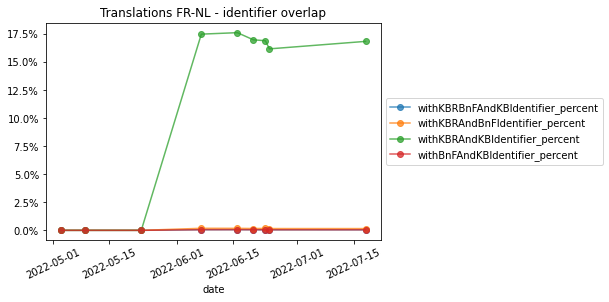

In [5]:
utils_plot.plotPercentageTimeline(statsFRNL,
                                  ['withKBRBnFAndKBIdentifier', 'withKBRAndBnFIdentifier',
                                  'withKBRAndKBIdentifier', 'withBnFAndKBIdentifier'],
                                  'Translations FR-NL - identifier overlap',
                                 'numberTranslations')

Because of the outlier KBR&KB below a graph without that line

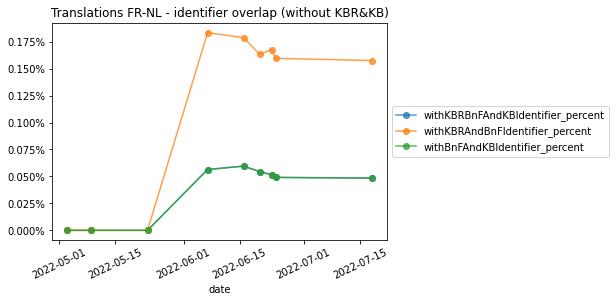

In [6]:
utils_plot.plotPercentageTimeline(statsFRNL,
                                  ['withKBRBnFAndKBIdentifier', 'withKBRAndBnFIdentifier', 'withBnFAndKBIdentifier'],
                                  'Translations FR-NL - identifier overlap (without KBR&KB)',
                                 'numberTranslations')

In [7]:
from IPython.display import display, Markdown
display(Markdown(statsFRNL['comment'].to_markdown()))

| date       | comment                                                                                                                                                                   |
|:-----------|:--------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| 2022-05-03 | Data integrated from KBR, BnF and KB based on ISBN10 and ISBN13 identifiers.                                                                                              |
| 2022-05-09 | Data integrated from KBR, BnF and KB based on ISBN10 and ISBN13 identifiers. Additionally KBR original title from field 246.                                              |
| 2022-05-23 | No changes to previous version.                                                                                                                                           |
| 2022-06-07 | Added publishing directors and included a collumn for source titles from KB                                                                                               |
| 2022-06-16 | Removed duplicate manifestations with the same ISBN10/ISBN13                                                                                                              |
| 2022-06-20 | New KBR data dump with plenty of additions and refinements and ISBN fix for FR-NL                                                                                         |
| 2022-06-23 | No ISBN duplicate removal anymore to prevent data loss                                                                                                                    |
| 2022-06-24 | New KBR dump with old Dutch, old French and middle French as well as new data in general                                                                                  |
| 2022-07-18 | Dataprofile query filtering also for Belgian organizations, not just Belgian persons (KB data was also updated from SPARQL endpoint, but did not cause more translations) |

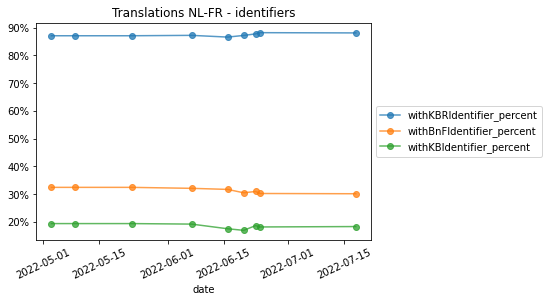

In [8]:
utils_plot.plotPercentageTimeline(statsNLFR,
                                  ['withKBRIdentifier', 'withBnFIdentifier', 'withKBIdentifier'],
                                  'Translations NL-FR - identifiers',
                                 'numberTranslations')

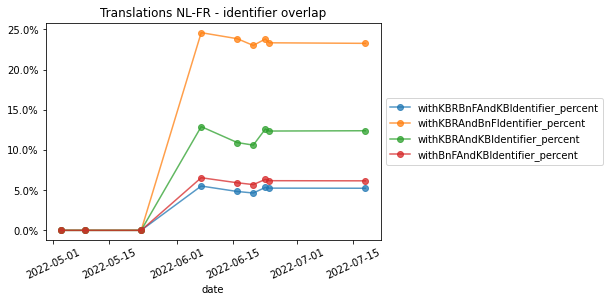

In [9]:
utils_plot.plotPercentageTimeline(statsNLFR,
                                  ['withKBRBnFAndKBIdentifier', 'withKBRAndBnFIdentifier',
                                  'withKBRAndKBIdentifier', 'withBnFAndKBIdentifier'],
                                  'Translations NL-FR - identifier overlap',
                                 'numberTranslations')

## ISBN identifiers
The total number of translations and how many have ISBN10/ISBN13.

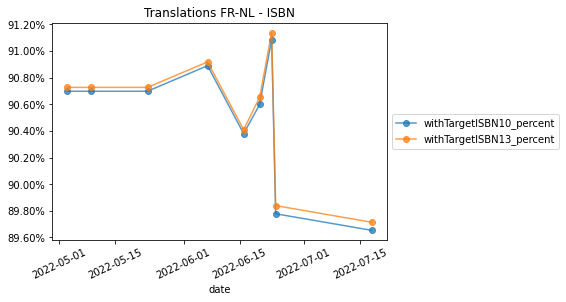

In [10]:
utils_plot.plotPercentageTimeline(statsFRNL,
                                  ['withTargetISBN10', 'withTargetISBN13'],
                                  'Translations FR-NL - ISBN',
                                 'numberTranslations')

In [11]:
from IPython.display import display, Markdown
display(Markdown(statsFRNL['comment'].to_markdown()))

| date       | comment                                                                                                                                                                   |
|:-----------|:--------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| 2022-05-03 | Data integrated from KBR, BnF and KB based on ISBN10 and ISBN13 identifiers.                                                                                              |
| 2022-05-09 | Data integrated from KBR, BnF and KB based on ISBN10 and ISBN13 identifiers. Additionally KBR original title from field 246.                                              |
| 2022-05-23 | No changes to previous version.                                                                                                                                           |
| 2022-06-07 | Added publishing directors and included a collumn for source titles from KB                                                                                               |
| 2022-06-16 | Removed duplicate manifestations with the same ISBN10/ISBN13                                                                                                              |
| 2022-06-20 | New KBR data dump with plenty of additions and refinements and ISBN fix for FR-NL                                                                                         |
| 2022-06-23 | No ISBN duplicate removal anymore to prevent data loss                                                                                                                    |
| 2022-06-24 | New KBR dump with old Dutch, old French and middle French as well as new data in general                                                                                  |
| 2022-07-18 | Dataprofile query filtering also for Belgian organizations, not just Belgian persons (KB data was also updated from SPARQL endpoint, but did not cause more translations) |

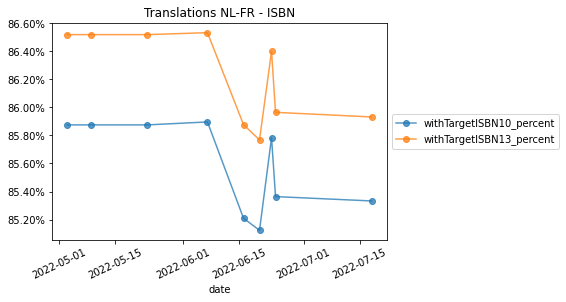

In [12]:
utils_plot.plotPercentageTimeline(statsNLFR,
                                  ['withTargetISBN10', 'withTargetISBN13'],
                                  'Translations NL-FR - ISBN',
                                 'numberTranslations')

## Information about original of translation (source)
The total number of translation and for how many we have which kind of information for the original.

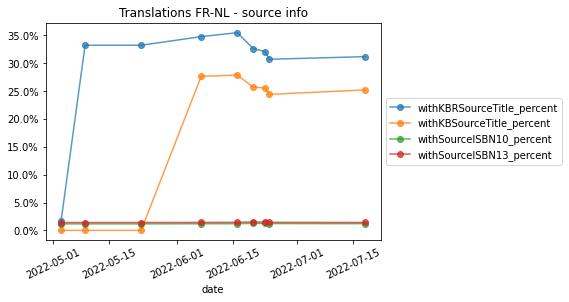

In [13]:
utils_plot.plotPercentageTimeline(statsFRNL,
                                  ['withKBRSourceTitle', 'withKBSourceTitle', 'withSourceISBN10', 'withSourceISBN13'],
                                  'Translations FR-NL - source info',
                                 'numberTranslations')

In [14]:
from IPython.display import display, Markdown
display(Markdown(statsFRNL['comment'].to_markdown()))

| date       | comment                                                                                                                                                                   |
|:-----------|:--------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| 2022-05-03 | Data integrated from KBR, BnF and KB based on ISBN10 and ISBN13 identifiers.                                                                                              |
| 2022-05-09 | Data integrated from KBR, BnF and KB based on ISBN10 and ISBN13 identifiers. Additionally KBR original title from field 246.                                              |
| 2022-05-23 | No changes to previous version.                                                                                                                                           |
| 2022-06-07 | Added publishing directors and included a collumn for source titles from KB                                                                                               |
| 2022-06-16 | Removed duplicate manifestations with the same ISBN10/ISBN13                                                                                                              |
| 2022-06-20 | New KBR data dump with plenty of additions and refinements and ISBN fix for FR-NL                                                                                         |
| 2022-06-23 | No ISBN duplicate removal anymore to prevent data loss                                                                                                                    |
| 2022-06-24 | New KBR dump with old Dutch, old French and middle French as well as new data in general                                                                                  |
| 2022-07-18 | Dataprofile query filtering also for Belgian organizations, not just Belgian persons (KB data was also updated from SPARQL endpoint, but did not cause more translations) |

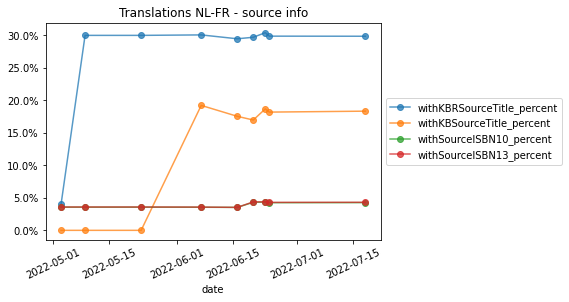

In [15]:
utils_plot.plotPercentageTimeline(statsNLFR,
                                  ['withKBRSourceTitle', 'withKBSourceTitle', 'withSourceISBN10', 'withSourceISBN13'],
                                  'Translations NL-FR - source info',
                                 'numberTranslations')

In [16]:
statsNLFR

,corpus,numberTranslations,withTargetISBN10,withTargetISBN13,withKBRIdentifier,withBnFIdentifier,withKBIdentifier,withKBRBnFAndKBIdentifier,withKBRAndBnFIdentifier,withKBRAndKBIdentifier,...,withKBRBnFAndKBIdentifier_percent,withKBRAndBnFIdentifier_percent,withKBRAndKBIdentifier_percent,withBnFAndKBIdentifier_percent,withTargetISBN10_percent,withTargetISBN13_percent,withKBRSourceTitle_percent,withKBSourceTitle_percent,withSourceISBN10_percent,withSourceISBN13_percent
date,,,,,,,,,,,,,,,,,,,,,
2022-05-03,NL-FR,3731,3204,3228,3249,1211,724,0,0,0,...,0.000000,0.000000,0.000000,0.000000,85.875101,86.518360,3.993567,0.000000,3.564728,3.591530
2022-05-09,NL-FR,3731,3204,3228,3249,1211,724,0,0,0,...,0.000000,0.000000,0.000000,0.000000,85.875101,86.518360,29.991959,0.000000,3.564728,3.591530
2022-05-23,NL-FR,3731,3204,3228,3249,1211,724,0,0,0,...,0.000000,0.000000,0.000000,0.000000,85.875101,86.518360,29.991959,0.000000,3.564728,3.591530
2022-06-07,NL-FR,3772,3240,3264,3290,1211,725,208,928,487,...,5.514316,24.602333,12.910923,6.548250,85.896076,86.532344,30.063627,19.220573,3.552492,3.579003
2022-06-16,NL-FR,3597,3065,3089,3115,1141,631,174,858,393,...,4.837364,23.853211,10.925771,5.921601,85.209897,85.877120,29.469002,17.542396,3.530720,3.530720
2022-06-20,NL-FR,3724,3170,3194,3247,1136,632,173,857,395,...,4.645542,23.012889,10.606874,5.692803,85.123523,85.767991,29.699248,16.970999,4.323308,4.377014
2022-06-23,NL-FR,3897,3343,3367,3420,1207,728,208,928,491,...,5.337439,23.813190,12.599435,6.338209,85.783936,86.399795,30.408006,18.681037,4.336669,4.387991
2022-06-24,NL-FR,3997,3412,3436,3525,1209,727,210,933,494,...,5.253940,23.342507,12.359269,6.179635,85.364023,85.964473,29.872404,18.188641,4.253190,4.303227
2022-07-18,NL-FR,4009,3421,3445,3532,1209,735,210,933,497,...,5.238214,23.272637,12.397107,6.161137,85.333001,85.931654,29.857820,18.333749,4.265403,4.315291


In [17]:
statsFRNL

,corpus,numberTranslations,withTargetISBN10,withTargetISBN13,withKBRIdentifier,withBnFIdentifier,withKBIdentifier,withKBRBnFAndKBIdentifier,withKBRAndBnFIdentifier,withKBRAndKBIdentifier,...,withKBRBnFAndKBIdentifier_percent,withKBRAndBnFIdentifier_percent,withKBRAndKBIdentifier_percent,withBnFAndKBIdentifier_percent,withTargetISBN10_percent,withTargetISBN13_percent,withKBRSourceTitle_percent,withKBSourceTitle_percent,withSourceISBN10_percent,withSourceISBN13_percent
date,,,,,,,,,,,,,,,,,,,,,
2022-05-03,FR-NL,6891,6250,6252,6125,58,1817,0,0,0,...,0.000000,0.000000,0.000000,0.000000,90.698012,90.727035,1.610797,0.000000,1.160935,1.407633
2022-05-09,FR-NL,6891,6250,6252,6125,58,1817,0,0,0,...,0.000000,0.000000,0.000000,0.000000,90.698012,90.727035,33.246263,0.000000,1.160935,1.407633
2022-05-23,FR-NL,6891,6250,6252,6125,58,1817,0,0,0,...,0.000000,0.000000,0.000000,0.000000,90.698012,90.727035,33.246263,0.000000,1.160935,1.407633
2022-06-07,FR-NL,7091,6445,6447,6325,58,1961,4,13,1240,...,0.056410,0.183331,17.486955,0.056410,90.889860,90.918065,34.790580,27.654774,1.184600,1.424341
2022-06-16,FR-NL,6715,6069,6071,5980,57,1873,4,12,1183,...,0.059568,0.178704,17.617275,0.059568,90.379747,90.409531,35.502606,27.892777,1.191363,1.444527
2022-06-20,FR-NL,7350,6659,6663,6669,51,1890,4,12,1248,...,0.054422,0.163265,16.979592,0.054422,90.598639,90.653061,32.639456,25.714286,1.265306,1.510204
2022-06-23,FR-NL,7752,7061,7065,7040,52,1983,4,13,1310,...,0.051600,0.167699,16.898865,0.051600,91.086171,91.137771,32.107843,25.580495,1.238390,1.470588
2022-06-24,FR-NL,8149,7316,7321,7439,51,1990,4,13,1318,...,0.049086,0.159529,16.173764,0.049086,89.777887,89.839244,30.727697,24.420174,1.214873,1.435759
2022-07-18,FR-NL,8254,7400,7405,7524,51,2082,4,13,1390,...,0.048461,0.157499,16.840320,0.048461,89.653501,89.714078,31.196995,25.224134,1.199418,1.417495


## All statistics for the 'other' corpus
Compared to above things are only in one graph

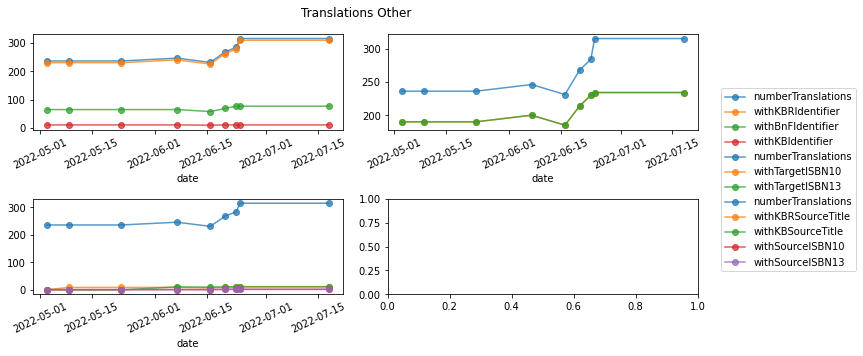

In [18]:
utils_plot.plotTranslationStats(statsOther, 'Translations Other')

In [19]:
statsOther

,corpus,numberTranslations,withTargetISBN10,withTargetISBN13,withKBRIdentifier,withBnFIdentifier,withKBIdentifier,withKBRBnFAndKBIdentifier,withKBRAndBnFIdentifier,withKBRAndKBIdentifier,withBnFAndKBIdentifier,withBBThesaurusID,withSourceKBRIdentifier,withKBRSourceTitle,withKBSourceTitle,withSourceISBN10,withSourceISBN13,comment
date,,,,,,,,,,,,,,,,,,
2022-05-03,OTHER,236,190,190,230,65,11,0,0,0,0,201,1,1,0,1,1,"Data integrated from KBR, BnF and KB based on ..."
2022-05-09,OTHER,236,190,190,230,65,11,0,0,0,0,201,1,9,0,1,1,"Data integrated from KBR, BnF and KB based on ..."
2022-05-23,OTHER,236,190,190,230,65,11,0,0,0,0,201,1,9,0,1,1,No changes to previous version.
2022-06-07,OTHER,246,200,200,240,65,11,2,59,10,3,211,1,9,11,1,1,Added publishing directors and included a coll...
2022-06-16,OTHER,231,185,185,225,58,10,1,52,9,2,201,1,7,10,1,1,Removed duplicate manifestations with the same...
2022-06-20,OTHER,268,214,214,262,69,11,2,63,10,3,231,3,10,11,2,2,New KBR data dump with plenty of additions and...
2022-06-23,OTHER,284,230,230,278,77,11,2,71,10,3,243,3,11,11,2,2,No ISBN duplicate removal anymore to prevent d...
2022-06-24,OTHER,315,234,234,309,77,11,2,71,10,3,273,4,12,11,2,2,"New KBR dump with old Dutch, old French and mi..."
2022-07-18,OTHER,315,234,234,309,77,11,2,71,10,3,273,4,12,11,2,2,Dataprofile query filtering also for Belgian o...


## Contributors

In [20]:
contributorMeasurementFiles = [
    '2022-05-03-person-contributor-stats.csv', '2022-05-23-person-contributor-stats.csv',
    '2022-06-16-person-contributor-stats.csv', '2022-05-09-person-contributor-stats.csv',
    '2022-06-07-person-contributor-stats.csv', '2022-06-20-person-contributor-stats.csv',
    '2022-06-23-person-contributor-stats.csv', '2022-06-24-person-contributor-stats.csv',
    '2022-07-18-person-contributor-stats.csv'
]

In [21]:
contributorStats = utils_stats.mergeMeasurementsToDataFrame('./measurements', contributorMeasurementFiles)

The following two plots show the proportion and integration of person contributor identifiers from our three main data sources in the corpus: KBR, BnF and KB. Most contributors have a KBR identifier.

Initially, the proportion of identifiers of these 3 sources was very low, because the contributor list also showed Belgians from the ISNI data dump which were actually not contributing to the corpus books. From the version of `2022-05-23` only actual contributors were counted, thus the proportions reflect the actual contributors.

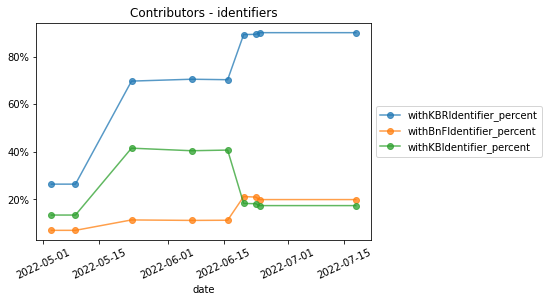

In [22]:
utils_plot.plotPercentageTimeline(contributorStats,
                                  ['withKBRIdentifier', 'withBnFIdentifier', 'withKBIdentifier'],
                                  'Contributors - identifiers',
                                 'numberContributors')

In [23]:
from IPython.display import display, Markdown
display(Markdown(contributorStats['comment'].sort_index().to_markdown()))

| date       | comment                                                                                                                                            |
|:-----------|:---------------------------------------------------------------------------------------------------------------------------------------------------|
| 2022-05-03 | Contributors integrated from ISNI SRU dump, KBR, BnF and NTA based on ISNI, VIAF and Wikidata identifiers.                                         |
| 2022-05-09 | Contributors integrated from ISNI SRU dump, KBR, BnF and NTA based on ISNI, VIAF and Wikidata identifiers.                                         |
| 2022-05-23 | Only count persons who are actually contributing to manifestations of the corpus (author, translator, illustrator, scenarist, publishing director) |
| 2022-06-07 | Added columns with statistics about how many books a contributor authored, translated etc.                                                         |
| 2022-06-16 | Added columns with statistics about how many books a contributor authored, translated etc.                                                         |
| 2022-06-20 | New KBR data dump with plenty of additions and refinements and ISBN fix for FR-NL.                                                                 |
| 2022-06-23 | No ISBN duplicate removal anymore to prevent data loss                                                                                             |
| 2022-06-24 | New KBR dump with old Dutch, old French and middle French as well as new data in general                                                           |
| 2022-07-18 | Adapted pre-processing for KB, thus the KB queries were executed on possibly updated data.                                                         |

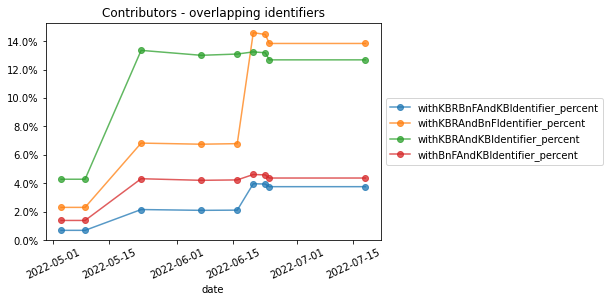

In [24]:
utils_plot.plotPercentageTimeline(contributorStats,
                                 ['withKBRBnFAndKBIdentifier', 'withKBRAndBnFIdentifier',
                                 'withKBRAndKBIdentifier', 'withBnFAndKBIdentifier'],
                                  'Contributors - overlapping identifiers',
                                 'numberContributors')

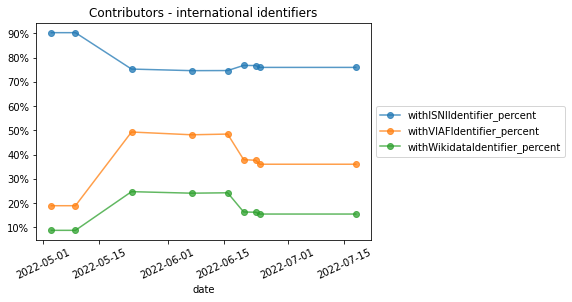

In [25]:
utils_plot.plotPercentageTimeline(contributorStats,
                                  ['withISNIIdentifier', 'withVIAFIdentifier', 'withWikidataIdentifier'],
                                  'Contributors - international identifiers',
                                 'numberContributors')

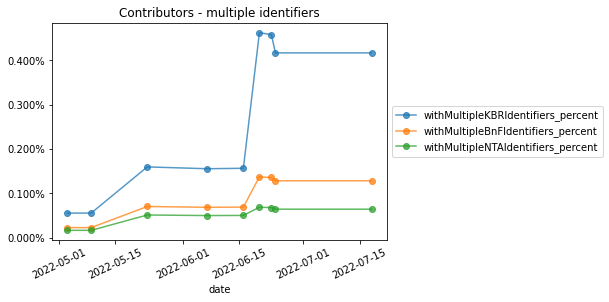

In [26]:
utils_plot.plotPercentageTimeline(contributorStats,
                                  list(map(lambda val: f'withMultiple{val}Identifiers', ['KBR', 'BnF', 'NTA'])),
                                  'Contributors - multiple identifiers',
                                 'numberContributors')

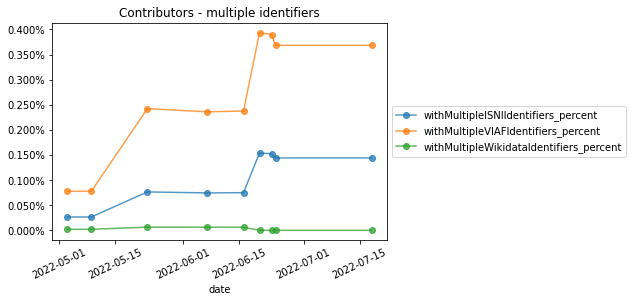

In [27]:
utils_plot.plotPercentageTimeline(contributorStats,
                                  list(map(lambda val: f'withMultiple{val}Identifiers', ['ISNI', 'VIAF', 'Wikidata'])),
                                  'Contributors - multiple identifiers',
                                 'numberContributors')

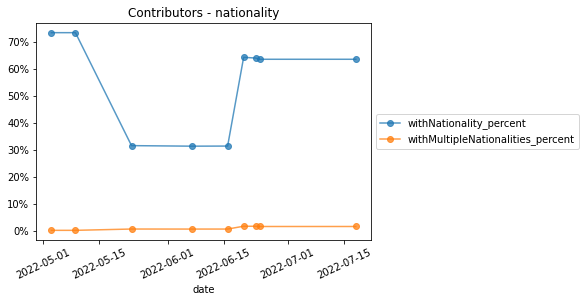

In [28]:
utils_plot.plotPercentageTimeline(contributorStats,
                                  ['withNationality', 'withMultipleNationalities'],
                                  'Contributors - nationality',
                                 'numberContributors')

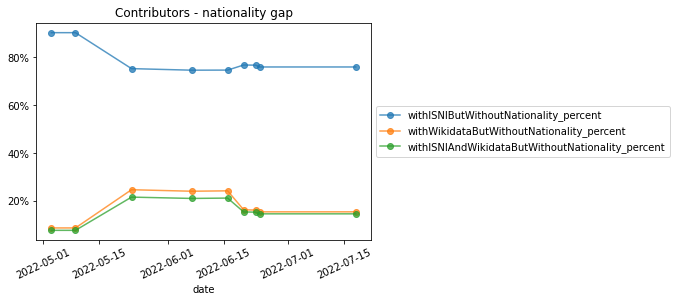

In [29]:
utils_plot.plotPercentageTimeline(contributorStats,
                                  ['withISNIButWithoutNationality', 'withWikidataButWithoutNationality',
                                  'withISNIAndWikidataButWithoutNationality'],
                                  'Contributors - nationality gap',
                                 'numberContributors')

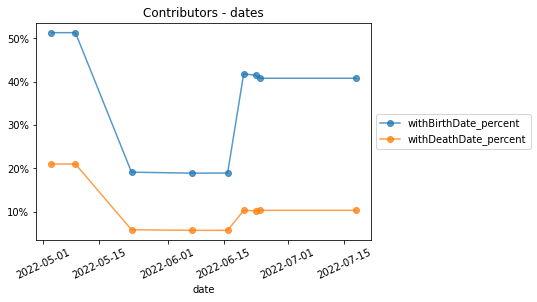

In [30]:
utils_plot.plotPercentageTimeline(contributorStats,
                                  ['withBirthDate', 'withDeathDate'],
                                  'Contributors - dates',
                                 'numberContributors')

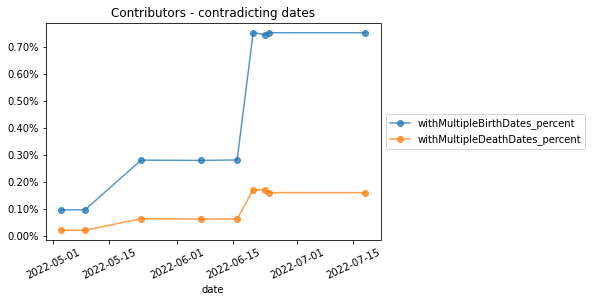

In [31]:
utils_plot.plotPercentageTimeline(contributorStats, 
                                  ['withMultipleBirthDates', 'withMultipleDeathDates'],
                                  'Contributors - contradicting dates',
                                 'numberContributors')

In [32]:
contributorStats

,numberContributors,withKBRIdentifier,withBnFIdentifier,withKBIdentifier,withKBRBnFAndKBIdentifier,withKBRAndBnFIdentifier,withKBRAndKBIdentifier,withBnFAndKBIdentifier,withISNIIdentifier,withVIAFIdentifier,...,withMultipleWikidataIdentifiers_percent,withNationality_percent,withMultipleNationalities_percent,withISNIButWithoutNationality_percent,withWikidataButWithoutNationality_percent,withISNIAndWikidataButWithoutNationality_percent,withBirthDate_percent,withDeathDate_percent,withMultipleBirthDates_percent,withMultipleDeathDates_percent
date,,,,,,,,,,,,,,,,,,,,,
2022-05-03,48835,12850,3357,6499,338,1127,2094,678,44084,9249,...,0.002048,73.455513,0.274393,90.271322,8.788779,7.785400,51.286987,21.015665,0.096242,0.020477
2022-05-23,15681,10923,1764,6499,338,1071,2094,678,11803,7734,...,0.006377,31.637013,0.758880,75.269434,24.736943,21.650405,19.137810,5.866973,0.280594,0.063771
2022-06-16,15991,11233,1779,6499,338,1086,2094,678,11938,7751,...,0.006254,31.473954,0.750422,74.654493,24.269902,21.243199,18.935651,5.746983,0.281408,0.062535
2022-05-09,48835,12850,3357,6499,338,1127,2094,678,44084,9249,...,0.002048,73.455513,0.274393,90.271322,8.788779,7.785400,51.286987,21.015665,0.096242,0.020477
2022-06-07,16100,11342,1780,6499,338,1087,2094,678,12013,7757,...,0.006211,31.434783,0.745342,74.614907,24.105590,21.099379,18.913043,5.732919,0.279503,0.062112
2022-06-20,5843,5214,1231,1063,232,853,774,270,4486,2216,...,0.000000,64.333390,1.797022,76.775629,16.361458,15.471504,41.776485,10.320041,0.753038,0.171145
2022-06-23,5901,5272,1232,1067,233,854,778,271,4527,2223,...,0.000000,64.056940,1.779359,76.715811,16.251483,15.370276,41.501440,10.235553,0.745636,0.169463
2022-06-24,6243,5621,1237,1079,235,864,792,273,4742,2250,...,0.000000,63.607240,1.697902,75.957072,15.505366,14.672433,40.781675,10.347589,0.752843,0.160179
2022-07-18,6243,5621,1237,1079,235,864,792,273,4742,2250,...,0.000000,63.607240,1.697902,75.957072,15.505366,14.672433,40.781675,10.347589,0.752843,0.160179
